# Root raised-cosine filter design

From CML FX919B datasheet: https://www.cmlmicro.com/wp-content/uploads/2017/06/FX919B_ds.pdf

## First calculate and plot the desired frequency response

In [1]:
from __future__ import print_function

%matplotlib inline

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

import matplotlib
import numpy as np
import matplotlib.pyplot as plt


def rrc(symrate, b, f):
    T = 1.0/symrate

    if f < (1.-b)/(2.0*T):
        return 1.
    elif f <= (1+b)/(2.0*T):
        return np.sqrt(0.5 * (1.0 - np.sin(np.pi * T * (f - 0.5/T)/b)))
    else:
        return 0.


@interact(symrate=1.0, b=0.2)
def g(symrate, b):
    f = np.linspace(0.0, 1.0, 100)
    r = np.array([rrc(symrate, b, x) for x in f])
    plt.plot(f, r)


interactive(children=(FloatSlider(value=1.0, description='symrate', max=3.0, min=-1.0), FloatSlider(value=0.2,…

## Next calculate a FIR filter to model the desired filter response

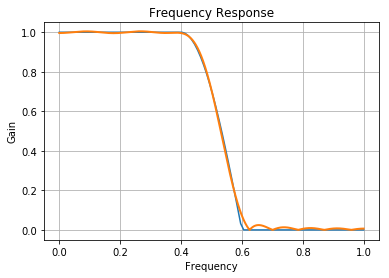

In [2]:
import scipy
import scipy.signal

# Calculate the desired RRC filter response
b = 0.2
f = np.linspace(0.0, 1.0, 100)
r = np.array([rrc(1.0, b, x) for x in f])

# Calculate the FIR taps required for the desired response
taps = scipy.signal.firls(numtaps=21, bands=f, desired=r)

# Plot the tap values
plt.plot(taps)
plt.xlabel('Tap')
plt.ylabel('Value')
plt.title('FIR taps')
plt.grid(True)

# Create a second figure and plot the actual frequency response against the desired frequency response
plt.figure(2)
w, h = scipy.signal.freqz(taps, worN=8000)
plt.plot(f, r)
plt.plot((w/np.pi)*1.0, np.absolute(h), linewidth=2)
plt.xlabel('Frequency')
plt.ylabel('Gain')
plt.title('Frequency Response')
plt.ylim(-0.05, 1.05)
plt.grid(True)

## Calculate the passband and stopband ripple

In [3]:
onequart   = len(h)//4
threequart = onequart * 3

# passband ripple
pbr = max(np.absolute(h[:onequart])) - min(np.absolute(h[:onequart]))

# stopband ripple
sbr = max(np.absolute(h[threequart:])) - min(np.absolute(h[threequart:]))


print("Passband ripple: %0.3f %%" % (pbr * 100.))
print("Stopband ripple: %0.3f %%" % (sbr * 100.))

Passband ripple: 0.902 %
Stopband ripple: 1.213 %
